###Introduction


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook" target="_blank">Cookbook<a/>.


Costumeiramente, importamos da seguinte forma:

In [ ]:
import numpy as np
import pandas as pd

##Estruturas de dados básicas no pandas

O pandas fornece dois tipos de classes para lidar com dados:

1.   <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a>: um array unidimensional rotulado que armazena dados de qualquer tipo, como inteiros, strings, objetos Python, etc.
2.   <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a>: uma estrutura de dados bidimensional que armazena dados como uma matriz bidimensional ou uma tabela com linhas e colunas.



## Object Creation


See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro">Intro to data structures section</a>.

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> by passing a list of values, letting pandas create a default <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.RangeIndex.html#pandas.RangeIndex">`RangeIndex`</a>.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a NumPy array, with a datetime index using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range">`date_range()`</a> and labeled columns:

In [ ]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.321202,1.176418,-0.701788,0.900526
2013-01-02,-0.558518,0.382046,-0.472387,0.618887
2013-01-03,-1.819415,-0.441709,-0.617776,-0.717575
2013-01-04,-0.742994,-0.878981,0.158646,-0.106611
2013-01-05,-1.993722,0.534489,0.209797,-0.397229
2013-01-06,-0.052229,0.947466,-0.273308,-0.472090


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a dictionary of objects where the keys are the column labels and the values are the column values.

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> have different <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">`dtypes`</a>:

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated
```
As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.



## Viewing data

See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics">Basics section</a>.

Use <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head">`DataFrame.head()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail">`DataFrame.tail()`</a> to view the top and bottom rows of the frame respectively:

In [ ]:
df.head()

,A,B,C,D
2013-01-01,-0.321202,1.176418,-0.701788,0.900526
2013-01-02,-0.558518,0.382046,-0.472387,0.618887
2013-01-03,-1.819415,-0.441709,-0.617776,-0.717575
2013-01-04,-0.742994,-0.878981,0.158646,-0.106611
2013-01-05,-1.993722,0.534489,0.209797,-0.397229


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.742994,-0.878981,0.158646,-0.106611
2013-01-05,-1.993722,0.534489,0.209797,-0.397229
2013-01-06,-0.052229,0.947466,-0.273308,-0.472090


Display the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index">`DataFrame.index`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns">`DataFrame.columns`</a>:

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Return a NumPy representation of the underlying <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> without the index or column labels:

In [ ]:
df.to_numpy()

array([[-0.32120224,  1.17641782, -0.70178837,  0.90052626],
       [-0.55851783,  0.38204626, -0.47238745,  0.61888665],
       [-1.81941498, -0.44170889, -0.61777558, -0.71757501],
       [-0.74299375, -0.87898093,  0.15864613, -0.10661141],
       [-1.99372173,  0.53448936,  0.2097974 , -0.39722912],
       [-0.05222886,  0.94746596, -0.27330794, -0.47209023]])

For `df2`, the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with multiple dtypes, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is relatively expensive:



In [ ]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

###Note:

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. If the common data type is object, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> will require copying data.





<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">`describe()`</a> shows a quick statistic summary of your data:

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.914680,0.286622,-0.282803,-0.029015
std,0.804393,0.798510,0.390210,0.647434
min,-1.993722,-0.878981,-0.701788,-0.717575
25%,-1.550310,-0.235770,-0.581429,-0.453375
50%,-0.650756,0.458268,-0.372848,-0.251920
75%,-0.380531,0.844222,0.050658,0.437512
max,-0.052229,1.176418,0.209797,0.900526


Transposing your data:

In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.321202,-0.558518,-1.819415,-0.742994,-1.993722,-0.052229
B,1.176418,0.382046,-0.441709,-0.878981,0.534489,0.947466
C,-0.701788,-0.472387,-0.617776,0.158646,0.209797,-0.273308
D,0.900526,0.618887,-0.717575,-0.106611,-0.397229,-0.472090


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index">`DataFrame.sort_index()`</a> sorts by an axis:

In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.900526,-0.701788,1.176418,-0.321202
2013-01-02,0.618887,-0.472387,0.382046,-0.558518
2013-01-03,-0.717575,-0.617776,-0.441709,-1.819415
2013-01-04,-0.106611,0.158646,-0.878981,-0.742994
2013-01-05,-0.397229,0.209797,0.534489,-1.993722
2013-01-06,-0.472090,-0.273308,0.947466,-0.052229


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values">`DataFrame.sort_values()`</a> sorts by values:

In [ ]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.742994,-0.878981,0.158646,-0.106611
2013-01-03,-1.819415,-0.441709,-0.617776,-0.717575
2013-01-02,-0.558518,0.382046,-0.472387,0.618887
2013-01-05,-1.993722,0.534489,0.209797,-0.397229
2013-01-06,-0.052229,0.947466,-0.273308,-0.472090
2013-01-01,-0.321202,1.176418,-0.701788,0.900526


## Selection

NOTE: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat">`DataFrame.iat()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a>.

See the indexing documentation <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">Indexing and Selecting Data</a> and <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/advanced.html#advanced">MultiIndex / Advanced Indexing</a>.



### Getitem ([])

For a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a>, passing a single label selects a columns and yields a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> equivalent to `df.A`:

In [ ]:
df["A"]

2013-01-01   -0.321202
2013-01-02   -0.558518
2013-01-03   -1.819415
2013-01-04   -0.742994
2013-01-05   -1.993722
2013-01-06   -0.052229
Freq: D, Name: A, dtype: float64

For a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a>, passing a slice : selects matching rows:

In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,-0.321202,1.176418,-0.701788,0.900526
2013-01-02,-0.558518,0.382046,-0.472387,0.618887
2013-01-03,-1.819415,-0.441709,-0.617776,-0.717575


In [ ]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.558518,0.382046,-0.472387,0.618887
2013-01-03,-1.819415,-0.441709,-0.617776,-0.717575
2013-01-04,-0.742994,-0.878981,0.158646,-0.106611


### Selection by label

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label">Selection by Label</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Selecting a row matching a label:

In [ ]:
df.loc[dates[0]]

A   -0.321202
B    1.176418
C   -0.701788
D    0.900526
Name: 2013-01-01 00:00:00, dtype: float64

Selecting all rows (`:`) with a select column labels:

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.321202,1.176418
2013-01-02,-0.558518,0.382046
2013-01-03,-1.819415,-0.441709
2013-01-04,-0.742994,-0.878981
2013-01-05,-1.993722,0.534489
2013-01-06,-0.052229,0.947466


Showing label slicing, both endpoints are included:

In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.558518,0.382046
2013-01-03,-1.819415,-0.441709
2013-01-04,-0.742994,-0.878981


Reduction in the dimensions of the returned object:

In [ ]:
df.loc["20130102", ["A", "B"]]

A   -0.558518
B    0.382046
Name: 2013-01-02 00:00:00, dtype: float64

Selecting a single row and column label returns a scalar:

In [ ]:
df.loc[dates[0], "A"]

-0.3212022414248145

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.at[dates[0], "A"]

-0.3212022414248145

### Selection by position

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer">Selection by Position</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Select via the position of the passed integers:

In [ ]:
df.iloc[3]

A   -0.742994
B   -0.878981
C    0.158646
D   -0.106611
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.742994,-0.878981
2013-01-05,-1.993722,0.534489


By lists of integer position locations, similar to the NumPy/Python style:

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.558518,-0.472387
2013-01-03,-1.819415,-0.617776
2013-01-05,-1.993722,0.209797


For slicing rows explicitly:

In [ ]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.558518,0.382046,-0.472387,0.618887
2013-01-03,-1.819415,-0.441709,-0.617776,-0.717575


For slicing columns explicitly:

In [ ]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.176418,-0.701788
2013-01-02,0.382046,-0.472387
2013-01-03,-0.441709,-0.617776
2013-01-04,-0.878981,0.158646
2013-01-05,0.534489,0.209797
2013-01-06,0.947466,-0.273308


For getting a value explicitly:

In [ ]:
df.iloc[1, 1]

0.3820462624547203

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.iat[1, 1]

0.3820462624547203

### Boolean indexing

Select rows where `df.A` is greater than `0`.

In [ ]:
df[df["A"] > 0]

,A,B,C,D


Selecting values from a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> where a boolean condition is met:

In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.176418,NaN,0.900526
2013-01-02,NaN,0.382046,NaN,0.618887
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,0.158646,NaN
2013-01-05,NaN,0.534489,0.209797,NaN
2013-01-06,NaN,0.947466,NaN,NaN


Using the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin">`isin()`</a> method for filtering:

In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.321202,1.176418,-0.701788,0.900526,one
2013-01-02,-0.558518,0.382046,-0.472387,0.618887,one
2013-01-03,-1.819415,-0.441709,-0.617776,-0.717575,two
2013-01-04,-0.742994,-0.878981,0.158646,-0.106611,three
2013-01-05,-1.993722,0.534489,0.209797,-0.397229,four
2013-01-06,-0.052229,0.947466,-0.273308,-0.472090,three


In [ ]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.819415,-0.441709,-0.617776,-0.717575,two
2013-01-05,-1.993722,0.534489,0.209797,-0.397229,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df["F"] = s1

Setting values by label:

In [ ]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [ ]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.701788,5.0,NaN
2013-01-02,-0.558518,0.382046,-0.472387,5.0,1.0
2013-01-03,-1.819415,-0.441709,-0.617776,5.0,2.0
2013-01-04,-0.742994,-0.878981,0.158646,5.0,3.0
2013-01-05,-1.993722,0.534489,0.209797,5.0,4.0
2013-01-06,-0.052229,0.947466,-0.273308,5.0,5.0


A `where` operation with setting:

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.701788,-5.0,NaN
2013-01-02,-0.558518,-0.382046,-0.472387,-5.0,-1.0
2013-01-03,-1.819415,-0.441709,-0.617776,-5.0,-2.0
2013-01-04,-0.742994,-0.878981,-0.158646,-5.0,-3.0
2013-01-05,-1.993722,-0.534489,-0.209797,-5.0,-4.0
2013-01-06,-0.052229,-0.947466,-0.273308,-5.0,-5.0


## Missing data

pandas primarily uses the `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [ ]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.701788,5.0,NaN,1.0
2013-01-02,-0.558518,0.382046,-0.472387,5.0,1.0,1.0
2013-01-03,-1.819415,-0.441709,-0.617776,5.0,2.0,NaN
2013-01-04,-0.742994,-0.878981,0.158646,5.0,3.0,NaN


[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:



In [ ]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.558518,0.382046,-0.472387,5.0,1.0,1.0


[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [ ]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.701788,5.0,5.0,1.0
2013-01-02,-0.558518,0.382046,-0.472387,5.0,1.0,1.0
2013-01-03,-1.819415,-0.441709,-0.617776,5.0,2.0,5.0
2013-01-04,-0.742994,-0.878981,0.158646,5.0,3.0,5.0


[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [ ]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Calculate the mean value for each column:


In [ ]:
df.mean()

A   -0.861146
B    0.090552
C   -0.282803
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [ ]:
df.mean(1)

2013-01-01    1.074553
2013-01-02    1.070228
2013-01-03    0.824220
2013-01-04    1.307334
2013-01-05    1.550113
2013-01-06    2.124386
Freq: D, dtype: float64

Calculate the mean value for each row:

In [ ]:
df.mean(axis=1)

2013-01-01    1.074553
2013-01-02    1.070228
2013-01-03    0.824220
2013-01-04    1.307334
2013-01-05    1.550113
2013-01-06    2.124386
Freq: D, dtype: float64

Operating with another <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with ``np.nan``.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.819415,-1.441709,-1.617776,4.0,1.0
2013-01-04,-3.742994,-3.878981,-2.841354,2.0,0.0
2013-01-05,-6.993722,-4.465511,-4.790203,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### User defined functions

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html#pandas.DataFrame.agg">`DataFrame.agg()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html#pandas.DataFrame.transform">`DataFrame.transform()`</a> applies a user defined function that reduces or broadcasts its result respectively.





In [ ]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -4.822419
B     0.507091
C    -1.583695
D    28.000000
F    16.800000
dtype: float64

In [ ]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-71.020983,506.0,NaN
2013-01-02,-56.522004,38.663082,-47.805610,506.0,101.2
2013-01-03,-184.124796,-44.700940,-62.518888,506.0,202.4
2013-01-04,-75.190967,-88.952870,16.054989,506.0,303.6
2013-01-05,-201.764639,54.090323,21.231497,506.0,404.8
2013-01-06,-5.285561,95.883556,-27.658763,506.0,506.0


### Value Counts

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    4
2    3
3    3
4    3
5    0
6    4
7    1
8    5
9    3
dtype: int64

In [ ]:
s.value_counts()

3    4
0    2
4    2
1    1
5    1
Name: count, dtype: int64

### String Methods

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [ ]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.514288,-0.747941,0.091937,-0.093737
1,-0.016710,-2.456197,0.368893,-0.064424
2,-0.527511,-0.963012,0.340760,-0.734544
3,-0.548300,0.332908,-1.768433,0.917074
4,1.179736,0.278282,-0.324652,-2.973351
5,0.556199,-1.849508,0.664401,-0.937220
6,0.197413,-0.789937,0.846306,-1.472404
7,-1.012666,1.316190,1.198418,0.758506
8,0.235738,0.591042,-0.251040,-0.731003
9,-0.444149,0.480139,0.897669,2.035792


In [ ]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,1.514288,-0.747941,0.091937,-0.093737
1,-0.016710,-2.456197,0.368893,-0.064424
2,-0.527511,-0.963012,0.340760,-0.734544
3,-0.548300,0.332908,-1.768433,0.917074
4,1.179736,0.278282,-0.324652,-2.973351
5,0.556199,-1.849508,0.664401,-0.937220
6,0.197413,-0.789937,0.846306,-1.472404
7,-1.012666,1.316190,1.198418,0.758506
8,0.235738,0.591042,-0.251040,-0.731003
9,-0.444149,0.480139,0.897669,2.035792


NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Adding a column to a `DataFrame` is relatively fast. However adding a row requires a copy, and may be expensive. It is recorecommended passing a pre-build list of records to the `DataFrame` constructor instead of buildinga `DataFrame` by iteratively appending records to it.

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge)  on unique keys:

In [ ]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.302399,0.733051
1,bar,one,1.430898,0.141730
2,foo,two,1.210636,0.473437
3,bar,three,0.676697,-1.395255
4,foo,two,-1.370454,0.731944
5,bar,two,1.115821,-1.084389
6,foo,one,0.910821,-0.312101
7,foo,three,-0.027270,-0.862899


Grouping by a column label, selecting column labels, and then applying the `sum()` funcion to the resulting group:

In [ ]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,3.223416,-2.337913
foo,1.026133,0.763431


Grouping by multiple columns forms a [`MultiIndex`](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex), and again we can apply the `sum()` function:

In [ ]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.430898  0.141730
    three  0.676697 -1.395255
    two    1.115821 -1.084389
foo one    1.213220  0.420950
    three -0.027270 -0.862899
    two   -0.159818  1.205380

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [ ]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.962046  0.313126
      two    -1.110467 -0.323684
baz   one     0.033327  0.857802
      two    -0.048313 -2.075706

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [ ]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.962046
               B    0.313126
       two     A   -1.110467
               B   -0.323684
baz    one     A    0.033327
               B    0.857802
       two     A   -0.048313
               B   -2.075706
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [ ]:
stacked.unstack()

A         B
first second                    
bar   one     1.962046  0.313126
      two    -1.110467 -0.323684
baz   one     0.033327  0.857802
      two    -0.048313 -2.075706

In [ ]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.962046 -1.110467
      B  0.313126 -0.323684
baz   A  0.033327 -0.048313
      B  0.857802 -2.075706

In [ ]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.962046  0.033327
       B  0.313126  0.857802
two    A -1.110467 -0.048313
       B -0.323684 -2.075706

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.422091,-0.554475
1,one,B,foo,-0.822812,-0.469733
2,two,C,foo,1.523691,0.551392
3,three,A,bar,0.988463,1.577267
4,one,B,bar,0.649361,0.536344
5,one,C,bar,0.559765,0.401558
6,two,A,foo,0.561662,1.646903
7,three,B,foo,-0.586455,0.950626
8,one,C,foo,1.577459,0.875937
9,one,A,bar,1.415345,-1.287615


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.415345 -0.422091
      B  0.649361 -0.822812
      C  0.559765  1.577459
three A  0.988463       NaN
      B       NaN -0.586455
      C -2.184964       NaN
two   A       NaN  0.561662
      B  0.882130       NaN
      C       NaN  1.523691

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [ ]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    27291
Freq: 5T, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [ ]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06    0.440730
2012-03-07   -0.839596
2012-03-08   -0.728639
2012-03-09   -1.579730
2012-03-10    1.440008
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00    0.440730
2012-03-07 00:00:00+00:00   -0.839596
2012-03-08 00:00:00+00:00   -0.728639
2012-03-09 00:00:00+00:00   -1.579730
2012-03-10 00:00:00+00:00    1.440008
Freq: D, dtype: float64

 [``Series.tz_convert()``](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_convert.html#pandas.Series.tz_convert) converts a timezones aware time series to another time zone:

In [ ]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.440730
2012-03-06 19:00:00-05:00   -0.839596
2012-03-07 19:00:00-05:00   -0.728639
2012-03-08 19:00:00-05:00   -1.579730
2012-03-09 19:00:00-05:00    1.440008
Freq: D, dtype: float64

Adding a non-fixed duration ([``BusinessDay``](https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.BusinessDay.html#pandas.tseries.offsets.BusinessDay)) to a time series:

In [ ]:
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-02-07', '2012-03-07', '2012-04-06', '2012-05-07',
               '2012-06-07'],
              dtype='datetime64[ns]', freq=None)

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [ ]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [ ]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [ ]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

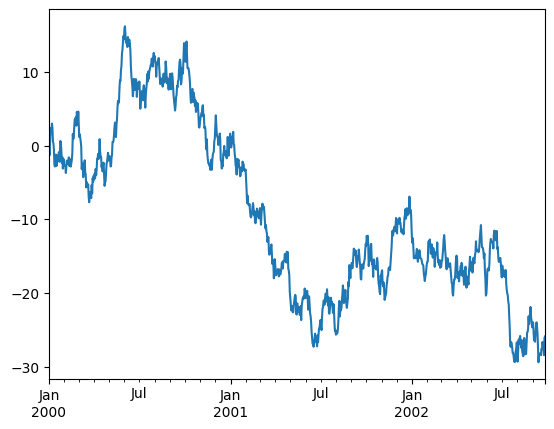

In [ ]:
import matplotlib.pyplot as plt
plt.close("all")

# The plt.close method is used to close a figure window:

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

###Note:
If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

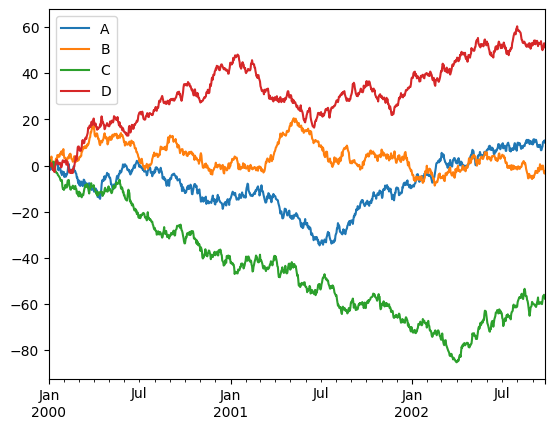

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

See the [IO Tools](https://pandas.pydata.org/docs/user_guide/io.html#io) section.

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [ ]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [ ]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,4,3,4,4,0
1,1,1,2,3,4,2
2,2,3,1,4,3,0
3,3,3,3,1,1,4
4,4,2,4,0,3,3
5,5,2,1,1,1,0
6,6,1,3,4,3,0
7,7,3,4,2,4,4
8,8,4,1,3,1,0
9,9,4,2,3,3,4


### Parquet

Writing to a Parquet file:


In [ ]:
df.to_parquet("foo.parquet")

Reading from a Parquet file Store using  [``read_parquet()``](https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html#pandas.read_parquet):

In [ ]:
pd.read_parquet("foo.parquet")

,0,1,2,3,4
0,4,3,4,4,0
1,1,2,3,4,2
2,3,1,4,3,0
3,3,3,1,1,4
4,2,4,0,3,3
5,2,1,1,1,0
6,1,3,4,3,0
7,3,4,2,4,4
8,4,1,3,1,0
9,4,2,3,3,4


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,4,3,4,4,0
1,1,1,2,3,4,2
2,2,3,1,4,3,0
3,3,3,3,1,1,4
4,4,2,4,0,3,3
5,5,2,1,1,1,0
6,6,1,3,4,3,0
7,7,3,4,2,4,4
8,8,4,1,3,1,0
9,9,4,2,3,3,4


## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [ ]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.